# A genetic algorithm for optimizing function with two variables

Minimize
$$f(x,y)=(x+2y-7)^2+(2x+y-5)^2$$

Subject to 
$$-10 \le x \le 10$$
$$-10 \le y \le 10$$

Global minimum
$$
f(1,3)=0
$$

Plot

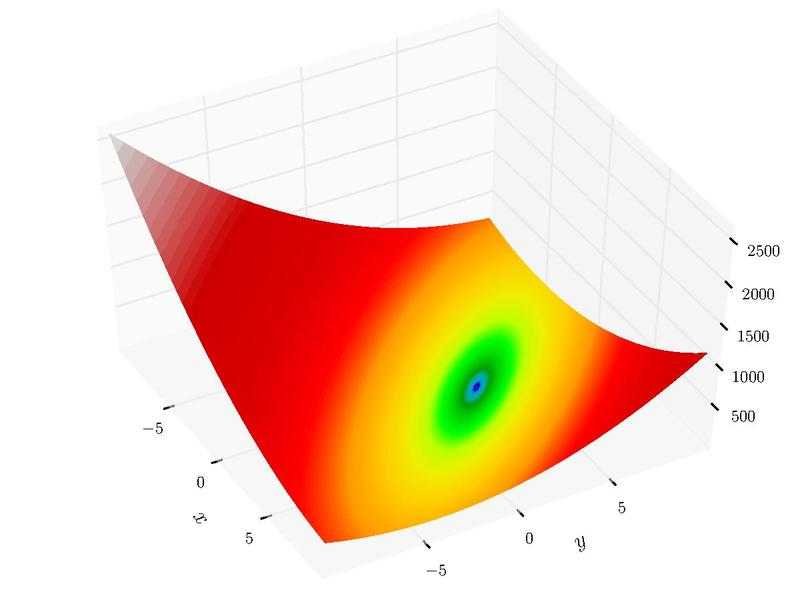

In [1]:
import numpy as np
import pandas as pd

In [2]:
# minimum value and maximum value of the variables in the function
min_value = -10
max_value = 10

# number of variables, length of chromosome
m = 2

# number of chromosomes in population
n = 100



# maximum generation
N = 100

In [3]:
def createPopulation():
    pop = np.random.rand(n, m)*(max_value - min_value) + min_value
    pop = pd.DataFrame(pop)
    pop.columns = ['x', 'y']
    
    return pop

In [4]:
def fitness(pop):
    fitness = (pop['x'] + 2*pop['y'] - 7)**2 + (2*pop['x'] + pop['y'] - 5)**2
    pop['fitness'] = fitness
    
    return pop

In [5]:
def randomSelection():
    position = np.random.permutation(n)
    
    return position[0], position[1]

In [6]:
def crossover(pop):
    popc = pop.copy()
    for i in range(n):
        a, b = randomSelection()
        x = (pop.loc[a] + pop.loc[b])/2
        popc.loc[i] = x
    
    return popc

In [7]:
def mutation(popc, i):
    popm = popc.copy()

    for i in range(n):
        for j in popm.columns:
            popm.loc[i][j] += (np.random.rand()-0.5)/(i+1)

    return popm

In [8]:
def combinePopulation(pop, popc, popm):
    popAll = pop.copy()
    popAll = popAll.append(popc)
    popAll = popAll.append(popm)

    popAll = popAll.drop_duplicates()

    popAll.index = range(len(popAll))

    return popAll

In [9]:
def sort(popAll):
    popAll = popAll.sort_values(by=['fitness'])
    
    popAll.index = range(len(popAll))

    return popAll

In [10]:
def elimination(popAll):
    pop = popAll.head(n)
    
    return pop

In [12]:
pop = createPopulation()
pop = fitness(pop)
print('Population 0 (Initial)')
print(pop)

for i in range(1, N+1):
    popc = crossover(pop)
    popc = fitness(popc)

    popm = mutation(popc, i)
    popm = fitness(popm)

    popAll = combinePopulation(pop, popc, popm)

    popAll = sort(popAll)

    pop = elimination(popAll)
    
    print()
    print('Population ' + str(i))
    print(pop)

Population 0 (Initial)
           x         y      fitness
0   6.897175  6.130181   370.547340
1  -9.078219 -3.402266  1228.985057
2   9.294222  6.951951   684.287060
3  -7.823091 -6.534799  1516.807815
4  -5.636186 -2.264193   638.226818
..       ...       ...          ...
95 -6.341791  0.461719   450.808037
96  1.587208  9.944940   275.510043
97  4.235565  3.590836    69.383355
98 -2.752342 -0.051953   208.588201
99  8.471458 -2.838089   100.577554

[100 rows x 3 columns]

Population 1
           x         y    fitness
0   0.886302  2.554002   1.464878
1   0.881640  2.548945   1.514397
2   1.304545  2.086137   2.412965
3   1.314852  2.065217   2.510211
4   2.379785  1.760819   3.518456
..       ...       ...        ...
95  4.589750 -3.568426  91.520573
96  0.344142 -0.740531  91.734675
97  0.344506 -0.744882  91.907077
98 -4.989011  5.274921  96.221374
99  4.795020  3.740386  97.229957

[100 rows x 3 columns]

Population 2
           x         y    fitness
0   1.334060  2.695850   0.